# Task 1 : Data preparation and customer analytics
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## Environment Set Up

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


## 1. Examine and clean transaction data 

In [2]:
# Read data
filepath_t = "/Users/victoriafy/Desktop/Quantium/QVI_transaction_data.xlsx"
transaction = pd.read_excel(filepath_t)
print("Ready")

Ready


### 1）Summary original data

In [3]:
# Print first 10 rows
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
# Data.info
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### 2）Correcting the data type

In [5]:
# Seeing that 'DATE' is not in the correct format
transaction["DATE"] = pd.to_datetime(transaction["DATE"], origin="1899-12-30",unit="D")
transaction['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

### 3）Removing irrelevant values

We should check that we are looking at the right products

In [6]:
# Generate a summary of the PROD_NAME column
transaction["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Looks like we are definitely looking at potato chips but how can we check that these are all chips? <br>
We can do some basic text analysis by summarising the individual words in the product name.

In [7]:
# Split product names as well as remove all digits and special characters such as '&'
import re
PROD_word_only = transaction["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculate the frequency grouped by words and sort them
PROD_freq = pd.value_counts([word for name in PROD_word_only
                                for word in name]).sort_values(ascending=False)  
PROD_freq.head()

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
dtype: int64

There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

In [8]:
# Remove salsa
transaction = transaction[~transaction["PROD_NAME"].str.contains("[Ss]alsa")]

### 4）Handling missing values and outlines

In [9]:
# Summarise the data to check for nulls and possible outliers
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [10]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<AxesSubplot:>

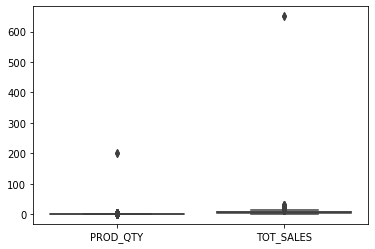

In [12]:
# Boxplot
sns.boxplot(data=transaction.loc[:,["PROD_QTY","TOT_SALES"]])

There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.

In [13]:
# Find the outlier
transaction.loc[transaction["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [14]:
# See what other transactions that customer made
transaction.loc[transaction["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [15]:
# Filter out the customer based on the loyalty card number
transaction = transaction.drop(index=[69762,69763])

# Re-examine transaction data
transaction.loc[transaction["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [16]:
# Count the number of transactions by date
trans_by_date = transaction.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [17]:
# Create a summary of transaction count by date
trans_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 
1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [18]:
# Create a sequence of dates and join this the count of transactions by date
# Create a column of dates that includes every day from 1 Jul 2018 to30 Jun 2019
dates_seq = pd.date_range("2018-07-01","2019-06-30")

# Join it onto the data to fill in the missing day.
fill_dates = trans_by_date.reindex(dates_seq)
fill_dates

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...
2019-06-26,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [19]:
# Find out the missing day
fill_dates.index.difference(transaction["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [20]:
# It seems like 2018-12-25 is the missing day
fill_dates.loc['2018-12-25',:]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

Text(0, 0.5, 'Transaction')

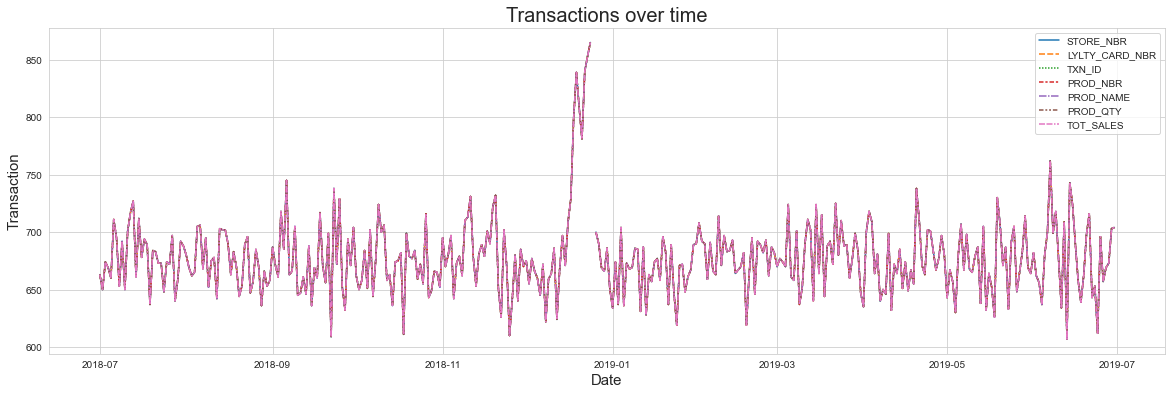

In [21]:
# Plot transactions over time
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=fill_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

Text(0, 0.5, 'Transaction')

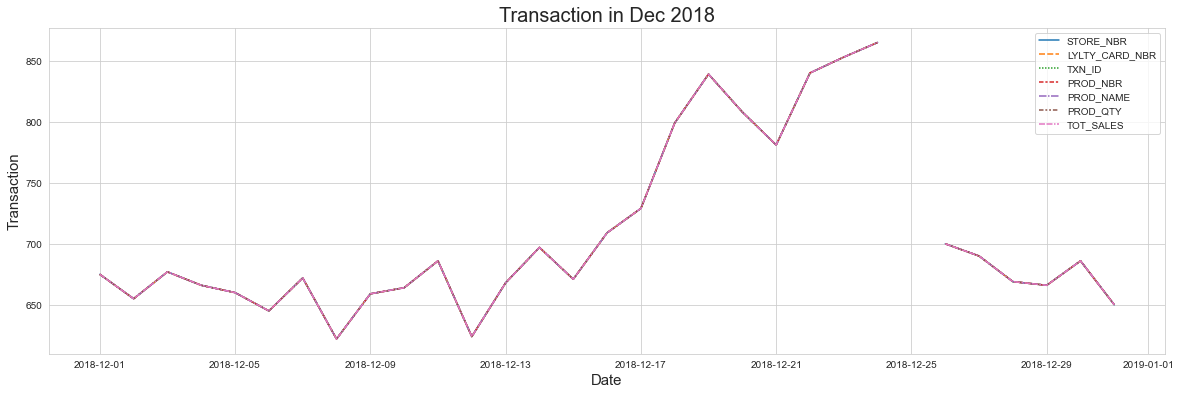

In [22]:
# Zoom in to December and look at individual days
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=fill_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day. Thus, we will not treat this point as an outlier.
Now we can move on to create other features such as brand of chips or pack size from PROD_NAME. 

### 5）Creating other features

In [23]:
# Start with pack size
# Taking the digits that are in PROD_NAME
transaction["PACK_SIZE"] = transaction["PROD_NAME"].str.extract("([0-9]+)").astype("float")
transaction["PACK_SIZE"].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

Let's check if the pack sizes look sensible

In [24]:
# Descriptive statistics of PACK_SIZE
transaction["PACK_SIZE"].describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

The largest size is 380g and the smallest size is 70g - seems sensible!

Text(0, 0.5, 'Number of Transactions')

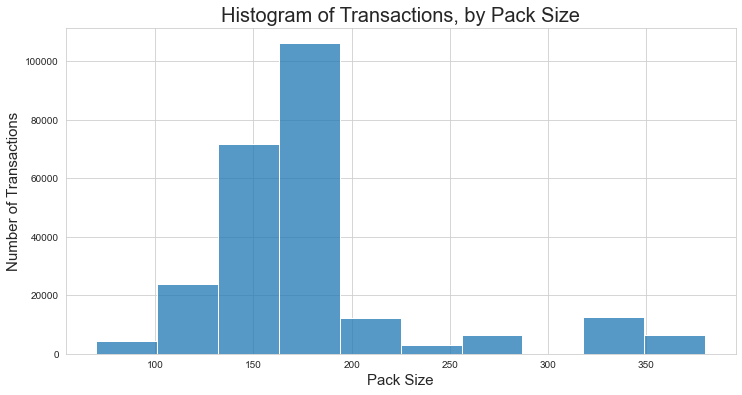

In [25]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x=transaction["PACK_SIZE"], bins=10, kde=False)
plt.title("Histogram of Transactions, by Pack Size",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)

Pack sizes created look reasonable, since they are mostly concentrated between 150 and 200, which is a common size.

In [26]:
# Now to create brands, we can use the first word in PROD_NAME 
transaction["BRAND"] = transaction["PROD_NAME"].str.split().str[0]
transaction["BRAND"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [27]:
# Check their names
bd = transaction["BRAND"].unique()
bd.sort()
bd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

Some of the brand names look like they are of the same brands <br>
*  Dorito    and Doritos<br>
*  Grain     and GrnWves    (not sure)<br>
*  Infuzions and Infzns<br>
*  NCC       and Natural    (not sure)<br>
*  Red       and RRD        (not sure)<br>
*  Smith     and Smiths<br>
*  Snbts     and Sunbites<br>
*  WW        and Woolworths<br>
Let's combine these together.

In [28]:
# Check brands which are not sure
transaction["PROD_NAME"].loc[transaction["BRAND"]=="Grain"].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

In [29]:
transaction["PROD_NAME"].loc[transaction["BRAND"]=="Natural"].head()

0       Natural Chip        Compny SeaSalt175g
40      Natural ChipCo      Hony Soy Chckn175g
75     Natural Chip Co     Tmato Hrb&Spce 175g
214    Natural Chip Co     Tmato Hrb&Spce 175g
234     Natural ChipCo      Hony Soy Chckn175g
Name: PROD_NAME, dtype: object

In [30]:
transaction["PROD_NAME"].loc[transaction["BRAND"]=="Red"].head()

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

It seems like they are all the same brand

In [31]:
# Clean brand names
def rename_brand(new,old):
    transaction["BRAND"].loc[transaction["BRAND"]==old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

# Check results
nbd = transaction["BRAND"].unique()
nbd.sort()
nbd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Text(0.5, 0, 'Transaction')

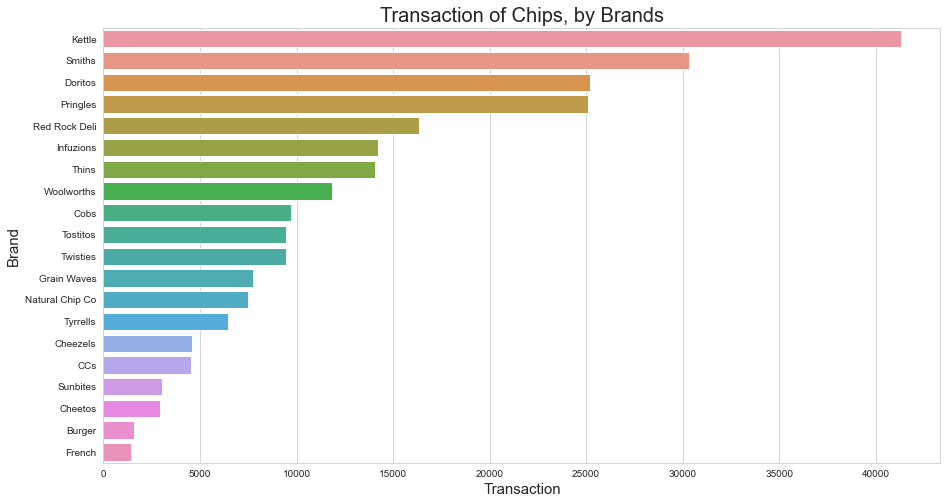

In [32]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = transaction["BRAND"].value_counts(),y=transaction["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

The bar chart clearly indicates that Kettle products the most popular chips.

### 6）Check entire transaction table

In [33]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


## 2. Examine and clean customer data

In [34]:
# Read data
filepath_c = "/Users/victoriafy/Desktop/Quantium/QVI_purchase_behaviour.csv"
customer = pd.read_csv(filepath_c)
print("Ready")

Ready


### 1）Summary original data

In [35]:
# Print first 5 rows
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [36]:
# Data.info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [37]:
# Summary numerical variable LYLTY_CARD_NBR
customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Let's see the distribution of Lifestage & Customer type by using pie chart

Text(0.5, 1.15, 'Distribution of Lifestage')

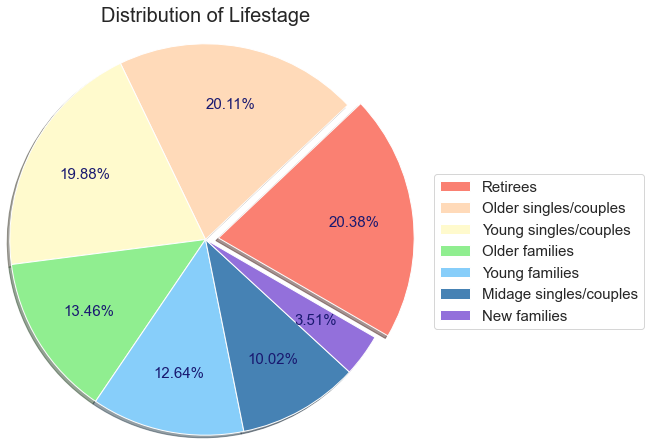

In [38]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))
colors = ['salmon', 'peachpuff', 'lemonchiffon', 'lightgreen', 'lightskyblue','steelblue','mediumpurple']
plt.pie(customer["LIFESTAGE"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0,0,0,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(customer["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)

Text(0.5, 1.15, 'Distribution of Customer Type')

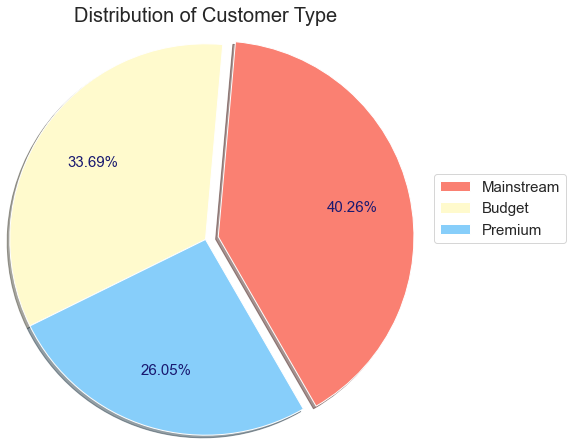

In [39]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(6,6))
colors = ['salmon', 'lemonchiffon', 'lightskyblue']
plt.pie(customer["PREMIUM_CUSTOMER"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0),
                                                     textprops= {'fontsize':15,'color':'midnightblue'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(customer["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Customer Type", y=1.15, fontsize=20)

There are 72637 customer sample in this table. Among these customers, the majority are retirees, 20.38%, while the number of new families is the least, only 3.51%. For customer type, Mainstream customers account for the largest proportion，followed by Budget customers, and finally by the Premium customers. 

### 2）Merge dataset

In [40]:
# Merge transaction data to customer data
merge_data = pd.merge(transaction,customer,on="LYLTY_CARD_NBR")
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [41]:
merge_data.count()

DATE                246740
STORE_NBR           246740
LYLTY_CARD_NBR      246740
TXN_ID              246740
PROD_NBR            246740
PROD_NAME           246740
PROD_QTY            246740
TOT_SALES           246740
PACK_SIZE           246740
BRAND               246740
LIFESTAGE           246740
PREMIUM_CUSTOMER    246740
dtype: int64

In [42]:
# Check if some customers were not matched on by checking for nulls
merge_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.<br>
For next step(Task 2), we will save this dataset as csv

### 3）Saving as csv

In [43]:
# save as csv
merge_data.to_csv("merge_data.csv")

## 3. Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:<br>
* Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is<br>
* How many customers are in each segment<br>
* How many chips are bought per customer by segment<br>
* What's the average chip price by customer segment<br>

We could also ask our data team for more information. Examples are:<br>
* The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips<br>
* Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

### 1）Total sales

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [44]:
#  Calculate the total sales by those dimensions
totsales_l_p = pd.DataFrame(merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totsales_l_p

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

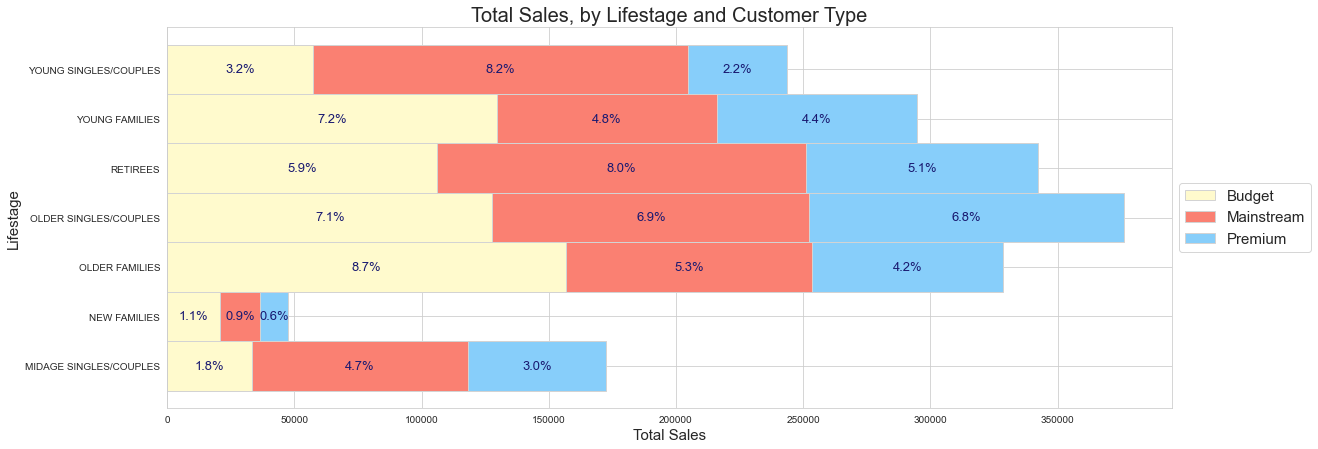

In [45]:
# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = totsales_l_p.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

In [46]:
# Plot to show total sales in each customer segement
#plt.figure(figsize=(18,7))
#plt.tick_params(labelsize=12)
#ax=sns.barplot(x=totsales_l_p.reset_index()["LIFESTAGE"], y=totsales_l_p.reset_index()["TOT_SALES"], 
#            hue=totsales_l_p.reset_index()["PREMIUM_CUSTOMER"], 
#            palette=sns.color_palette("Paired", 3))
#plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)
#plt.legend(fontsize=15)
#plt.xlabel("Lifestage",fontsize=15)
#plt.ylabel("Total Sales",fontsize=15)

Sales are coming mainly from <br>
* Budget - Older Families<br>
* Mainstream - Young Singles/Couples<br>
* Mainstream - Retirees<br>
Let's see if the higher sales are due to there being more customers who buy chips

### 2）Customer counts 

In [47]:
#  Calculate the customer count in each segment
count_l_p = pd.DataFrame(customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count_l_p.columns=["CUSTOMER_COUNTS"]
count_l_p

CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

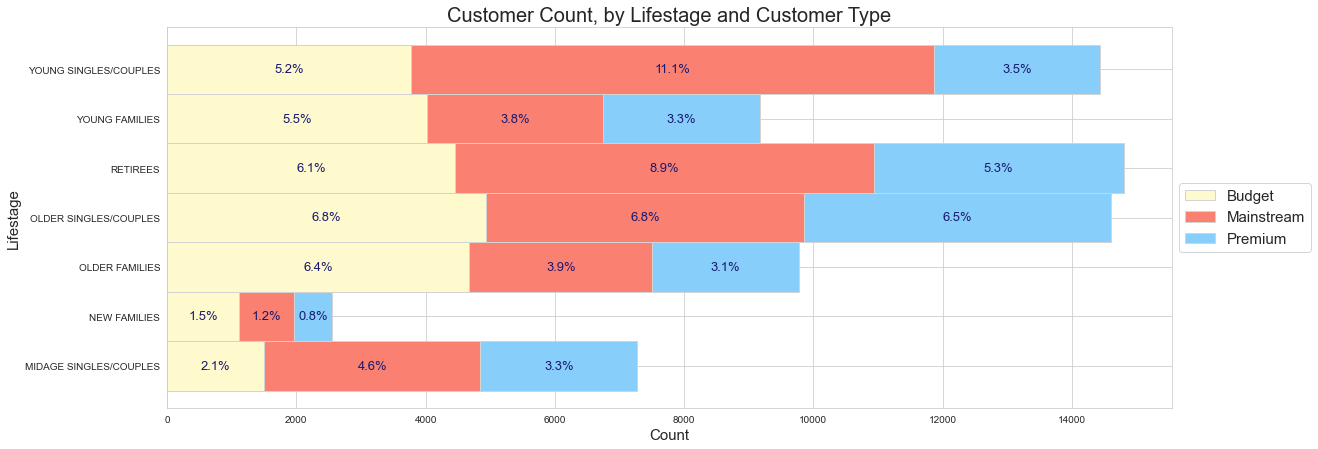

In [48]:
# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["CUSTOMER_COUNTS"]
bars2 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["CUSTOMER_COUNTS"]
bars3 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["CUSTOMER_COUNTS"]
 
bars1_text = (bars1 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count_l_p.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

In [49]:
# Plot to show customer count in each segment
#plt.figure(figsize=(18,7))
#plt.tick_params(labelsize=12)
#sns.barplot(x=count_l_p.reset_index()["LIFESTAGE"], y=count_l_p.reset_index()["CUSTOMER_COUNTS"], 
#            hue=count_l_p.reset_index()["PREMIUM_CUSTOMER"], 
#            palette=sns.color_palette("Paired", 3))
#plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)
#plt.legend(loc=0, fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
#plt.xlabel("Lifestage",fontsize=15)
#plt.ylabel("Count",fontsize=15)

We can clearly find out that there are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

### 3）Average Sales Quantity

Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next

In [50]:
# Calculate the average number of units per customer by those two dimensions
merge_l_p = pd.merge(totsales_l_p,count_l_p,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_l_p['SALES_QTY'] = merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_l_p['AVG_SALES_QTY'] = (merge_l_p["SALES_QTY"]/merge_l_p["CUSTOMER_COUNTS"])
merge_l_p

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250  
                       Mainstream            21213       6.351198  
                       Premium               14400       5.923488  
NEW FAMILIES           Budget                 5241       4.713129  
                       Mainstream             4060       4.782097  
                       Premium                2769       4.709184  
OLDER FAMILIES         Budget                41853       8.952513  
                       Mainstream            25804       9.114800  
                       Premium               20239       8.900176  
OLDER SINGLES/COUPLES  Budget                32883       6.671333  
                       Mainstream            32607       6.613996  
                       Premium               31695       6.672632  
RETIREES               Budget                26932       6.046700  
                       Mainstream            37677       5.815249  
                       Premium               23266       6.008781  
YOUNG FAMILIES         Budget                34482       8.584018  
                       Mainstream            23194       8.502199  
                       Premium               20901       8.590629  
YOUNG SINGLES/COUPLES  Budget                15500       4.101614  
                       Mainstream            36225       4.478858  
                       Premium               10575       4.108392

Text(0, 0.5, 'Average Sales Quantity')

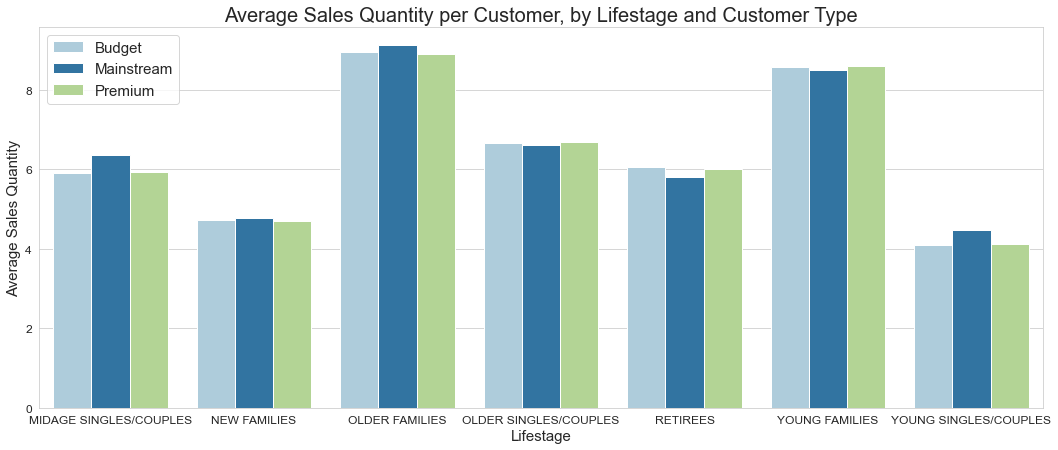

In [51]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_QTY"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

Older families and young families in general buy more chips per customer.

### 4）Average sales price

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [52]:
# Calculate the average price per unit sold (average sale price) by those two customer dimensions
merge_l_p['AVG_SALES_PRICE'] = (merge_l_p["TOT_SALES"]/merge_l_p["SALES_QTY"])
merge_l_p

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250   
                       Mainstream            21213       6.351198   
                       Premium               14400       5.923488   
NEW FAMILIES           Budget                 5241       4.713129   
                       Mainstream             4060       4.782097   
                       Premium                2769       4.709184   
OLDER FAMILIES         Budget                41853       8.952513   
                       Mainstream            25804       9.114800   
                       Premium               20239       8.900176   
OLDER SINGLES/COUPLES  Budget                32883       6.671333   
                       Mainstream            32607       6.613996   
                       Premium               31695       6.672632   
RETIREES               Budget                26932       6.046700   
                       Mainstream            37677       5.815249   
                       Premium               23266       6.008781   
YOUNG FAMILIES         Budget                34482       8.584018   
                       Mainstream            23194       8.502199   
                       Premium               20901       8.590629   
YOUNG SINGLES/COUPLES  Budget                15500       4.101614   
                       Mainstream            36225       4.478858   
                       Premium               10575       4.108392   

                                         AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                   
MIDAGE SINGLES/COUPLES Budget                   3.753878  
                       Mainstream               3.994449  
                       Premium                  3.780823  
NEW FAMILIES           Budget                   3.931969  
                       Mainstream               3.935887  
                       Premium                  3.886168  
OLDER FAMILIES         Budget                   3.747969  
                       Mainstream               3.736380  
                       Premium                  3.717703  
OLDER SINGLES/COUPLES  Budget                   3.887529  
                       Mainstream               3.822753  
                       Premium                  3.89

Text(0, 0.5, 'Average Sales Price')

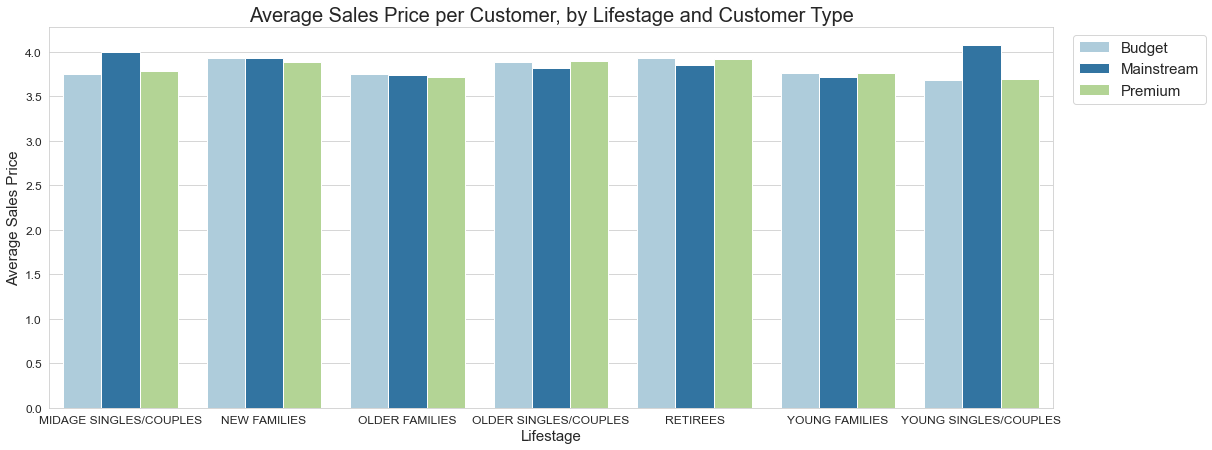

In [53]:
# Plot the average price per unit sold (average sale price) by those two customer dimensions.
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_PRICE"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Price",fontsize=15)

Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [54]:
from scipy import stats
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
new_merge=merge_l_p.reset_index()
mainstream = new_merge.loc[new_merge["PREMIUM_CUSTOMER"]=="Mainstream"]
others = new_merge.loc[(new_merge["PREMIUM_CUSTOMER"]=="Premium")|(new_merge["PREMIUM_CUSTOMER"]=="Budget")]
main_mid_young = mainstream["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
others_mid_young = others["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]

In [55]:
# Homogeneity of variance test
stats.levene(main_mid_young,others_mid_young)

LeveneResult(statistic=0.00490158871604531, pvalue=0.9475450406275435)

p > 0.05 indicates that the variance of them are different.

In [56]:
# Independent T-test
stats.ttest_ind(main_mid_young,others_mid_young, equal_var=False)

Ttest_indResult(statistic=6.635796901881934, pvalue=0.031128004009134885)

The t-test results in a p-value of 0.03 (< 0.05) show the statistical significant (95% confidence), i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## 4. Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.<br>
We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips. Besides, let's also find out if our target segment tends to buy larger packs of chips.

In [70]:
# Brands and package sizes of 'Mainstream - young singles/couples' Segment and other segments
s = pd.DataFrame(merge_data.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND","PACK_SIZE","PROD_QTY"]])
m_ysc = s[(s["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(s["PREMIUM_CUSTOMER"]=="Mainstream")]
m_ysc.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE,PROD_QTY
221345,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
221346,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
221347,1020,YOUNG SINGLES/COUPLES,Mainstream,Grain Waves,180.0,1
221348,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
221349,1163,YOUNG SINGLES/COUPLES,Mainstream,Natural Chip Co,175.0,1


In [58]:
# Most popular Brands and Package Sizes in this segment
# Most popular brands
m_ysc["BRAND"].value_counts().head(3)

Kettle      3844
Doritos     2379
Pringles    2315
Name: BRAND, dtype: int64

In [59]:
# Most popular package sizes
m_ysc["PACK_SIZE"].value_counts().head(3)

175.0    4997
150.0    3080
134.0    2315
Name: PACK_SIZE, dtype: int64

The best-selling brands in 'Mainstream - young singles/couples' Segment are Kettle, Doritos, and Pringles.<br>
For package sizes, 175g, 150g, and 134g are the most popular choices.

In [60]:
# Apriori analysis on brands
# Calculate sales quantity per brand per custermor in target segment
brand_s = m_ysc.groupby(["LYLTY_CARD_NBR","BRAND"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_b = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_b

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Frequent itemsets of our target segment
frequent_itemsets = apriori(basket_b, min_support=0.04, use_colnames=True)
frequent_itemsets.sort_values(by="support",ascending=False)

,support,itemsets
5,0.387142,(Kettle)
2,0.260326,(Doritos)
7,0.256158,(Pringles)
9,0.202476,(Smiths)
4,0.143110,(Infuzions)
10,0.136036,(Thins)
12,0.107364,(Twisties)
11,0.105848,(Tostitos)
1,0.103827,(Cobs)
8,0.093975,(Red Rock Deli)


In [62]:
# Output of apriori analysis
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by=["lift","confidence","support"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Infuzions),(Pringles),0.143110,0.256158,0.041051,0.286849,1.119815,0.004392,1.043036
0,(Pringles),(Infuzions),0.256158,0.143110,0.041051,0.160256,1.119815,0.004392,1.020419


According to the Frequent itemsets, we clearly see that customers in our target segement(Mainstream - young singles/couples) prefer Kettle more than other brands.<br>
We can also prove an association among chips of different brands from the output of apriori analysis. More specifically, since lift > 1, which means that buying chips of one brand will boost sales of another brand chips, we can put chips of Infuzions and Pringles together for sale.

In [63]:
# Apriori analysis on package size
# Calculate sales quantity per package size per custermor in target segment
brand_s = m_ysc.groupby(["LYLTY_CARD_NBR","PACK_SIZE"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_ps = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_ps

PACK_SIZE,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1060,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
# Frequent itemsets of our target segment
frequent_itemsets_ps = apriori(basket_ps, min_support=0.06, use_colnames=True)
frequent_itemsets_ps.sort_values(by="support",ascending=False)

,support,itemsets
5,0.458254,(175.0)
2,0.313755,(150.0)
1,0.256158,(134.0)
0,0.224454,(110.0)
4,0.176835,(170.0)
8,0.139320,(330.0)
14,0.137931,"(150.0, 175.0)"
3,0.127700,(165.0)
13,0.111153,"(134.0, 175.0)"
11,0.094480,"(110.0, 175.0)"


In [65]:
# Output of apriori analysis
association_rules(frequent_itemsets_ps, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(165.0),(175.0),0.127700,0.458254,0.060124,0.470821,1.027423,0.001605,1.023747
1,(175.0),(165.0),0.458254,0.127700,0.060124,0.131202,1.027423,0.001605,1.004031


Our target segement(Mainstream - young singles/couples) prefer chips with 175g package size, which is a regular size, more than others. Similarly, there is an association among chips of different size, which recommands us to put chips of 175g and 165g together for sales.

## 5. Initial findings & Recommendations

### 1）Finding Summary<br>

#### Brands : <br>
#####  Top 3 best-selling brands :<br>
* Kettle<br>
* Smiths<br>
* Doritos

#####  Best-selling package sizes :<br>
* 175g

#### Customers : <br>
#####  Top 3 Lifestage :<br>
* Retirees 20.38%<br>
* Older Singles/Couples 20.11%<br>
* Young Singles/Couples 19.88%

#####  Customer Type :<br>
* Mainstream 40.26%<br>
* Budget 33.69%<br>
* Premium 26.05%

#####  Total Sales - Top 3 sales driver segments :<br>
* Budget - Older Families (higher quantity per customer in older families)<br>
* Mainstream - Young Singles/Couples (higher customer counts and higher average purchase price)<br>
* Mainstream - Retirees (higher customer counts)

#####  Other facts :<br>
* Customer counts : There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips.<br>
* Average purchase quantity : Older families and young families in general buy more chips per customer.<br>
* Average purchase price : Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts (statistical significant).

#### Target segment : Mainstream - Young Singles/Couples<br>
#####  Top 3 best-selling brands :<br>
* Kettle<br>
* Doritos<br>
* Pringles

#####  Top 3 best-selling package sizes :<br>
* 175g<br>
* 150g<br>
* 134g

### 2）Recommendations<br>
#### General :<br>
* Increase sales promotion of Kettle (all size) and 175g (all brands) chips

#### Target segments : <br>
##### Budget - Older Families :<br>
* Promotion like 'Buy Two Get One Free' : <br>  Because of their higher average purchase quantity, promotions like this can boost sales.

##### Mainstream - Young Singles/Couples :<br>
* Target advertisements : <br>  This segment has the majority of customers and thus should be the focus of our marketing. Targeted advertising around areas such as colleges and universities is probably a good strategy.<br>
* Change the display area : <br>  Placing some chips next to other young people’s daily necessities will also attract their attention, thereby increasing sales.<br>
* Promotion and repackaging on popular brands and sizes : <br>  In addition to Kettle and 175g chips, which is popular among all segments, Doritos and Pringles are popular in this segement. Therefore, we can increase promotion of these chips as well as advice their productors and Suppliers to repackage their products. For instance, they can use more vibrant colors and fonts to gain love from young people. Meanwhile, similar strategy is also useful for 150g and 134g chips.<br>
* Strategies metioned above can be used in combination to maximize the effect.

##### Mainstream - Retirees :<br>
* Target advertisements : <br>  Similar to last segment, we can put targeted advertising because of the large number of customers. 
* Limited time sales promotions during daytime : <br>  Retired customers are more inclined to shop during daytime, so we can choose products that are popular in this segment for promotion when these customers visit.